# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откройте файл с данными и изучите общую информацию. 

In [1]:
#импортирую необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings(action='ignore')

In [2]:
#сохроняю данные файла в датафрейм
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
#вывожу информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
#переименовываю столбец cityCenters_nearest в city_centers_nearest
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

In [5]:
#вывожу десять первых строк датафрейма
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [6]:
data.duplicated().sum()

0

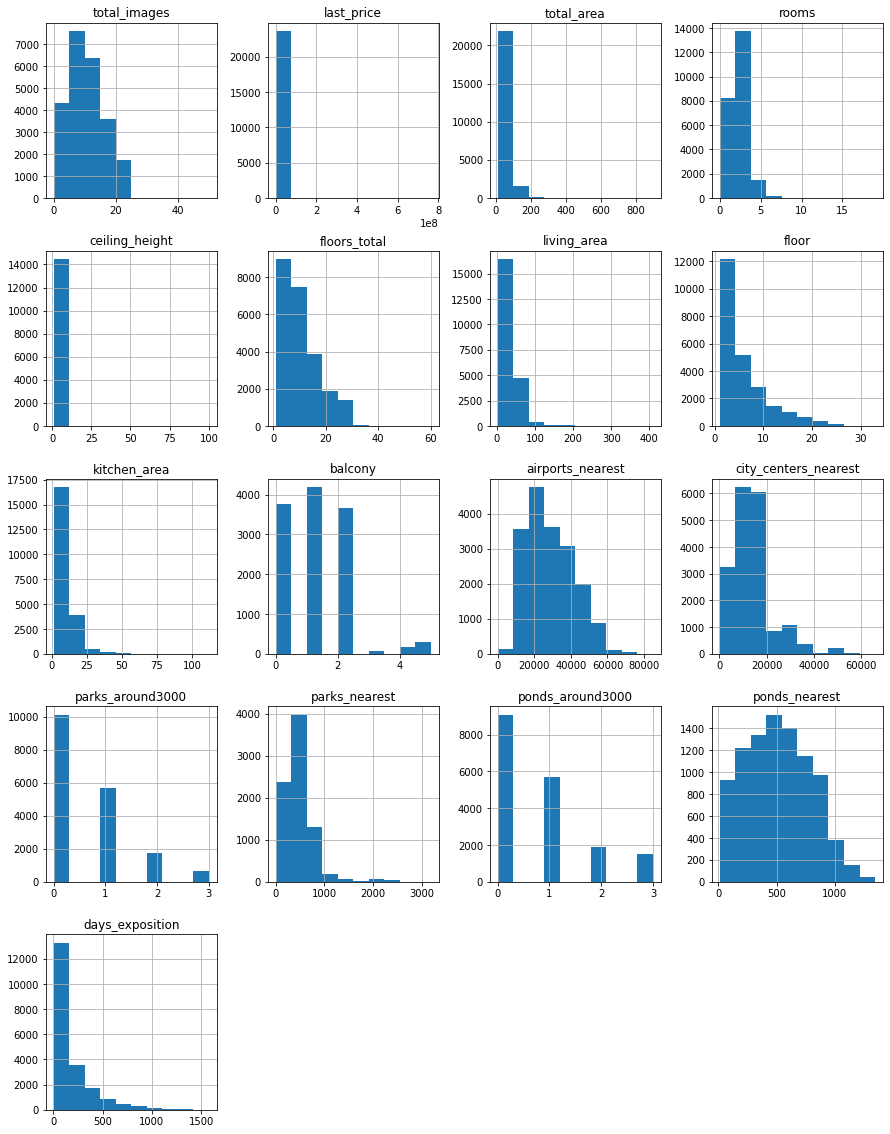

In [7]:
#строю общую гистограмму для всех столбцов таблицы
data.hist(figsize=(15, 20));

## Предобработка данных

### Обработка пропущенных значений

In [8]:
#вывел количество пропущенных значений в каждом столбце
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
#удаляю все пропуски из столбца locality_name тк определить названия населенного пункта практически невозможно,
#а количество пропусков от общей суммы датафрейма мало
#тоже самое проделаю с floors_total
data = data.dropna(subset=['locality_name','floors_total'])

In [10]:
#заменяю все пропуски в ceiling_height на медианное значение ceiling_height
ceiling_height_median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)

Сделаю срез без пропущенных значений в living_area и kitchen_area

In [11]:
data_for_ratio = data.query('living_area != "NaN" & kitchen_area != "NaN"')

Считаю соотношение кухня + жилая к общей площади

In [12]:
ratio = (data_for_ratio['living_area'] + data_for_ratio['kitchen_area']) / data_for_ratio['total_area']
ratio.mean()

0.7495945238843186

In [13]:
ratio.median()

0.75

Те 75 процентов это кухня + жилая площадь, а 25 другое.
Соответственно можем рассчитать коэффициент для кухни и жилой площади отдельно

In [14]:
ratio_kitchen = (data_for_ratio['total_area'] * 0.25 + data_for_ratio['living_area']) / data_for_ratio['total_area']
ratio_kitchen.median()

0.8182100157906609

Те жилая + другая площадь ~ 82 процента, соответственно 18 процентов это кухня

In [15]:
ratio_living = (data_for_ratio['total_area'] * 0.25 + data_for_ratio['kitchen_area']) / data_for_ratio['total_area']
ratio_living.median()

0.4223625557206538

Те кухня + другая площадь ~ 42 процента, соответственно 58 процентов это жилая площадь

Зная коэффициенты можем заполнить пропуски на кухне и жилой площади умножаю их на общую площадь квартиры

In [16]:
data['living_area'] = data['living_area'].fillna(data['total_area'] * 0.58)

In [17]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * 0.18)

In [18]:
data['balcony'] = data['balcony'].fillna(0)

In [19]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [20]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [21]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [22]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

**Вывод по пропущенным значениям:** были удалены все пропущенные значения в "locality_name" и "floors_total", тк нельзя как либо точно опеределить название места и количества этажей в здании, к тому же общее число пропусков было не велико, те этими данными можно пренебречь. В "ceiling_height" пропуски были заменены на медианное значение. В "living_area"  и "kitchen_area" пропуски замененые на данные из "total_area" помноженные на коэффициенты.Пропуски в "parks_around3000", "ponds_around3000", "balcony" и "is_apartment" были заменены на 0 и False. Пропуски в картографических данных("parks_nearest" и тд) было решено оставить, тк не понятно на что их можно заменить.

### Изменение типа данных

In [23]:
#изменяю тип данных для last_price
data['last_price'] = data['last_price'].astype(int)

In [24]:
data['balcony'] = data['balcony'].astype(int)

In [25]:
data['floor'] = data['floor'].astype(int)

In [26]:
data['floors_total'] = data['floors_total'].astype(int)

In [27]:
data['parks_around3000'] = data['parks_around3000'].astype(int)

In [28]:
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

In [29]:
#перевожу first_day_exposition в тип datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], yearfirst=True)

**Вывод по изменению типа данных:** В "last_price", "balcony", "floor", "floors_total", "parks_around3000" и "ponds_around3000" были изменены по типу с вещественных на целочисленные, а first_day_exposition изменен для дальнейшей работы в тип datetime. В остальных данных  изменение приведет к округленнию важных значений(например "living_area").

### Устранение неявных дубликатов

In [30]:
#вывел перечень уникальных значений столбца locality_name
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [31]:
#привел к нижнему регистру названия в locality_name
data['locality_name'] = data['locality_name'].str.lower()

In [32]:
#меняю 'посёлок' и все синонимы этого слова на 'поселок' в locality_name
name = 'посёлок'
name_1 = 'поселок'
for r in data['locality_name'].unique():
    rows = (data['locality_name'] == r) & (data['locality_name'].str.contains(name))
    data.loc[rows, "locality_name"] = data['locality_name'].str.replace(name, name_1)

In [33]:
name = 'поселок городского типа'
name_1 = 'поселок'
for r in data['locality_name'].unique():
    rows = (data['locality_name'] == r) & (data['locality_name'].str.contains(name))
    data.loc[rows, "locality_name"] = data['locality_name'].str.replace(name, name_1)

In [34]:
name = 'городской поселок'
name_1 = 'поселок'
for r in data['locality_name'].unique():
    rows = (data['locality_name'] == r) & (data['locality_name'].str.contains(name))
    data.loc[rows, "locality_name"] = data['locality_name'].str.replace(name, name_1)

In [35]:
name = 'коттеджный поселок'
name_1 = 'поселок'
for r in data['locality_name'].unique():
    rows = (data['locality_name'] == r) & (data['locality_name'].str.contains(name))
    data.loc[rows, "locality_name"] = data['locality_name'].str.replace(name, name_1)

In [36]:
name = 'поселок пансионат'
name_1 = 'поселок'
for r in data['locality_name'].unique():
    rows = (data['locality_name'] == r) & (data['locality_name'].str.contains(name))
    data.loc[rows, "locality_name"] = data['locality_name'].str.replace(name, name_1)

In [37]:
name = 'садовое товарищество'
name_1 = 'поселок'
for r in data['locality_name'].unique():
    rows = (data['locality_name'] == r) & (data['locality_name'].str.contains(name))
    data.loc[rows, "locality_name"] = data['locality_name'].str.replace(name, name_1)

In [38]:
name = 'поселок при железнодорожной станции'
name_1 = 'поселок'
for r in data['locality_name'].unique():
    rows = (data['locality_name'] == r) & (data['locality_name'].str.contains(name))
    data.loc[rows, "locality_name"] = data['locality_name'].str.replace(name, name_1)

In [39]:
name = 'садоводческое некоммерческое товарищество'
name_1 = 'поселок'
for r in data['locality_name'].unique():
    rows = (data['locality_name'] == r) & (data['locality_name'].str.contains(name))
    data.loc[rows, "locality_name"] = data['locality_name'].str.replace(name, name_1)

In [40]:
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок красный бор', 'гатчина', 'деревня фёдоровское', 'выборг',
       'кронштадт', 'кировск', 'деревня новое девяткино',
       'поселок металлострой', 'поселок лебяжье', 'поселок сиверский',
       'поселок молодцово', 'поселок кузьмоловский',
       'поселок новая ропша', 'павловск', 'деревня пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       'деревня куттузи', 'поселок аннино', 'поселок ефимовский',
       'поселок плодовое', 'деревня заклинье', 'поселок торковичи',
       'поселок первомайское', 'красное село', 'поселок понтонный',
       'сясьстрой', 'деревня старая', 'деревня лесколово',
       'поселок новый свет', 'сланцы', 'село путилово', 'ивангород',
       'мурино', 'шлиссельбург', 'никольское', 'зеленогорск',
       'сосн

**Вывод по устранению неявных дубликатов:** в "locality_name" оказалось много синонимов слова "посёлок", всех их свёл под единое слово "поселок", так же было решено не совмещать "поселок" и "деревня", тк это разные типы населенных пунктов, а те погрешности, что остались можно принять незначительными

### Устранение аномальных значений

In [41]:
#посчитаю общую сумму строк в ceiling_height до удаления
data['ceiling_height'].value_counts().sum()

23565

In [42]:
#вывел перечень уникальных значений столбца ceiling_height
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

In [43]:
#удаляю все значения меньше 2 и больше 5
data = data.drop(data.loc[(data['ceiling_height'] <= 2) | (data['ceiling_height'] >= 5)].index)

In [44]:
#посчитаю общую сумму строк в ceiling_height после удаления
data['ceiling_height'].value_counts().sum()

23514

In [45]:
#вывел перечень уникальных значений столбца rooms
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [46]:
#удаляю значения с 0 комнат
data = data.drop(data.loc[(data['rooms'] == 0)].index)

In [47]:
#посчитаю общую сумму строк в rooms после удаления
data['rooms'].value_counts().sum()

23322

**Вывод по устранению аномальных значений:** в "ceiling_height" были удаленны значения меньше 2 и больше 5, тк помещения с такой высотой маловероятны, а количество строк с этими значениями невелико. Также удаляем 0 значения в "rooms"

### Вывод по предобработке данных

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23322 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23322 non-null  int64         
 1   last_price            23322 non-null  int64         
 2   total_area            23322 non-null  float64       
 3   first_day_exposition  23322 non-null  datetime64[ns]
 4   rooms                 23322 non-null  int64         
 5   ceiling_height        23322 non-null  float64       
 6   floors_total          23322 non-null  int64         
 7   living_area           23322 non-null  float64       
 8   floor                 23322 non-null  int64         
 9   is_apartment          23322 non-null  bool          
 10  studio                23322 non-null  bool          
 11  open_plan             23322 non-null  bool          
 12  kitchen_area          23322 non-null  float64       
 13  balcony         

**В ходе предобработки данных:** были обработанны пропущенные значения в "locality_name", "floors_total", "ceiling_height", "living_area", "kitchen_area", "airports_nearest", "cityCenters_nearest", "parks_around3000", "parks_nearest", "ponds_around3000" и "ponds_nearest". Большинство пропусков были заменены на медианные значения, малая часть удалена в следствии невозможности замены на что-либо подходящее.

Был изменен тип данных в "last_price" с float на int, тк их значения целые. Также тип object в "first_day_exposition" изменен на datetime64 для дальнейшей работы.

Были устранены неявные дубликаты в "locality_name".

Были удалены аномальные значения в "ceiling_height" и "rooms".

От изначального количества строк в датафрейме(23699) было в общей сумме удалено 377 строки, что составляет 1,57%.


## Посчитайте и добавьте в таблицу новые столбцы

### Цена одного квадратного метра

In [49]:
#добавляю в таблицу цену одного квадратного метра
data['price_per_square_meter'] = data['last_price'] / data['total_area']

### День недели публикации объявления

In [50]:
#добавляю в таблицу день недели публикации объявления
data['weekday'] = data['first_day_exposition'].dt.weekday

### Месяц публикации объявления

In [51]:
#добавляю в таблицу месяц публикации объявления
data['month'] = data['first_day_exposition'].dt.month

### Год публикации объявления

In [52]:
#добавляю в таблицу год публикации объявления
data['year'] = data['first_day_exposition'].dt.year

### Тип этажа квартиры

In [53]:
#пишу функцию с условием разделения этажей по типу
def floors_type(row):
    
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'Первый'
    if floor == floors_total:
        return 'Последний'
    if 1 < floor < floors_total:
        return 'Другое'

In [54]:
#добавляю в таблицу тип этажа квартиры
data['floors_type'] = data.apply(floors_type, axis = 1)

### Расстояние до центра города в километрах

In [55]:
#добавляю в таблицу расстояние до центра города в километрах
data['city_centers_nearest_km'] = data['city_centers_nearest'] / 1000

In [56]:
#округляю значения в city_centers_nearest_km
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].round()

## Проведите исследовательский анализ данных

### Изучите следующие параметры объектов

#### Общая площадь

<AxesSubplot:>

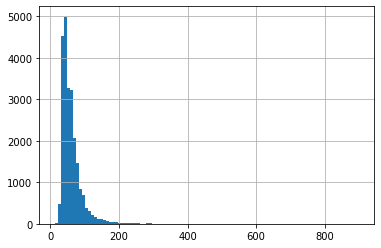

In [57]:
#строю гистограмму по total_area
data['total_area'].hist(bins = 100)

**Вывод:**Гистограмма показала, что большая часть общей площади квартир находится в диапозоне от 20 до 100 квадратных метров, что хорошо соотносится с действительностью

#### Жилая площадь

<AxesSubplot:>

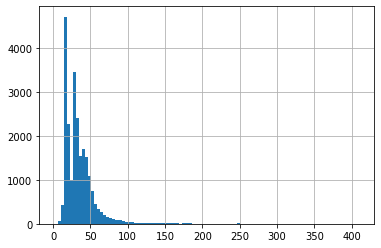

In [58]:
#строю гистограмму по living_area
data['living_area'].hist(bins = 100)

**Вывод:**Гистограмма показала, что большая часть жилой площади  находится в диапозоне от 20 до 50 квадратных метров, что тоже выглядит правдободобно. Интересно, что на отметки в 25 есть просадка

#### Площадь кухни

<AxesSubplot:>

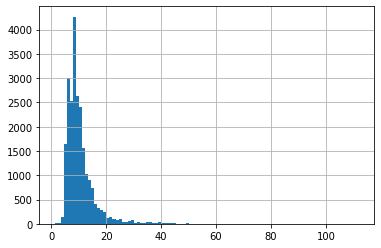

In [59]:
#строю гистограмму по kitchen_area
data['kitchen_area'].hist(bins = 100)

**Вывод:**Гистограмма показала, что большая часть площади кухни находится в диапозоне от 8 до 15 квадратных метров, что опять же очень похоже на реальные данные

#### Цена объекта

<AxesSubplot:>

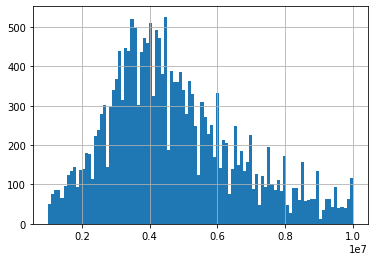

In [60]:
#строю гистограмму по last_price
data['last_price'].hist(bins = 100, range = (1000000, 10000000))

**Вывод:**Гистограмма показала, что в среднем цена за квартиру в дипозоне 4 миллионов рублей +- 0.5 миллиона

#### Количество комнат

<AxesSubplot:>

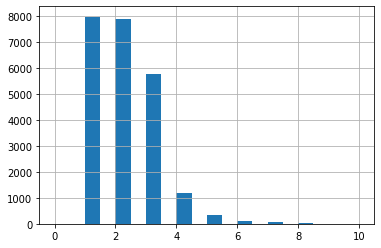

In [61]:
#строю гистограмму по rooms
data['rooms'].hist(bins = 20, range = (0, 10))

**Вывод:**Гистограмма показала, что большая часть квартир имеет от 1 до 3 комнат, что ни капельки не странно

#### Высота потолков

<AxesSubplot:>

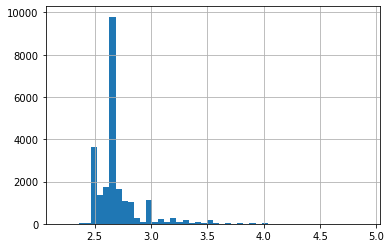

In [62]:
#строю гистограмму по ceiling_height
data['ceiling_height'].hist(bins = 50)

**Вывод:**Гистограмма показала, что потолки в квартира чаще всего высотой 2.70 метра, это тоже похоже на правду

#### Этаж квартиры

<AxesSubplot:>

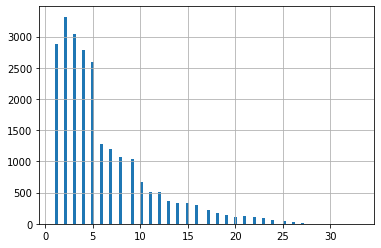

In [63]:
#строю гистограмму по floor
data['floor'].hist(bins = 100)

**Вывод:**Гистограмма показала, что большинство квартир находится от 1 до 5 этажа, это объясняется малым количеством высокоэтажных зданий в Петербурге и ЛО.

#### Тип этажа квартиры

<AxesSubplot:>

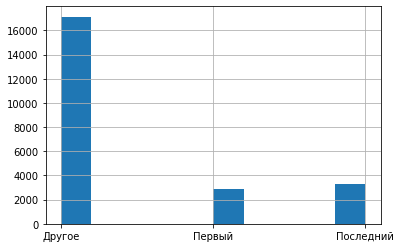

In [64]:
#строю гистограмму по floors_type
data['floors_type'].hist()

**Вывод:**Гистограмма показала, что больше продаются квартиры на других этажах, нежели на первом или последнем, тк в целом в категории больший охват этажей

#### Общее количество этажей в доме

<AxesSubplot:>

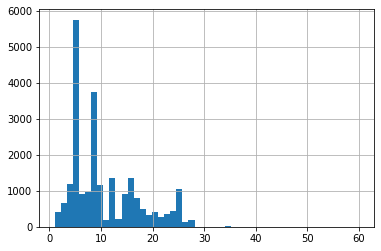

In [65]:
#строю гистограмму по floors_total
data['floors_total'].hist(bins = 50)

**Вывод:**Гистограмма показала, что большинство зданий Петербурга и ЛО 4 и 8 этажные, выглядит правдиво, тк здания оветсвкого периода(хрущевки, брежневки) имеют именно такую высотность и их очень много. Есть также единичные аномальные значения в 40+ этажей, но я решил их оставить, тк есть вероятность, что это продажи квартир в Лахта центре =)

#### Расстояние до центра города в метрах

<AxesSubplot:>

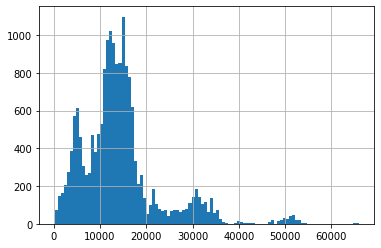

In [66]:
#строю гистограмму по city_centers_nearest
data['city_centers_nearest'].hist(bins = 100)

**Вывод:**Гистограмма показала, что в среднем большинство квартир находится на отдалении 15 километров от центра, но есть также несколько значений и в 50 километров, преполагаю, что в некоторых деревнях центром может считаться центр другой деревни в отдалении

#### Расстояние до ближайшего аэропорта

<AxesSubplot:>

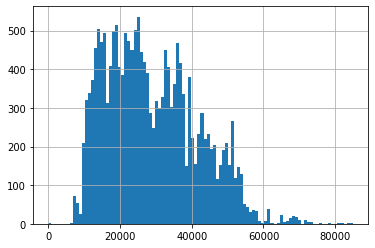

In [67]:
#строю гистограмму по airports_nearest
data['airports_nearest'].hist(bins = 100)

**Вывод:**Гистограмма показала, что в среднем большинство квартир находится на отдалении 15-40 километров от аэропорта, вполне ожидаемо

#### Расстояние до ближайшего парка

<AxesSubplot:>

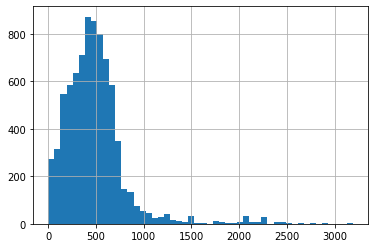

In [68]:
#строю гистограмму по parks_nearest
data['parks_nearest'].hist(bins = 50)

**Вывод:**Гистограмма показала, что большинство квартир находится в 500 метрах от парка

#### День и месяц публикации объявления

<AxesSubplot:>

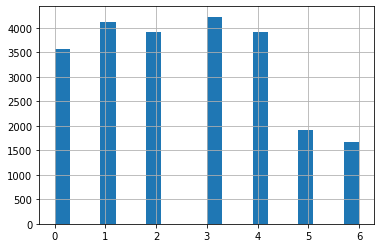

In [69]:
#строю гистограмму по weekday
data['weekday'].hist(bins = 20)

**Вывод:**Гистограмма показала, что в будние дни объявления создавались чаще, чем в выходные, предполагаю, что все дело в рабочем графике риелторских контор, которые не работают по выходным

<AxesSubplot:>

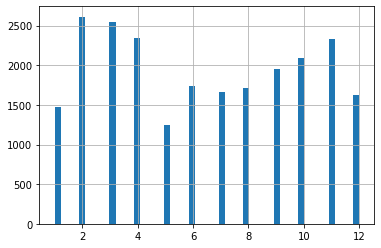

In [70]:
#строю гистограмму по month
data['month'].hist(bins = 50)

**Вывод:**Гистограмма показала, что чаще объявления создавались в феврале-апреле, чуть реже сентябрь-ноябрь и совсем редко летом и до/после нового года в декабре-январе

### Изучите, как быстро продавались квартиры

<AxesSubplot:>

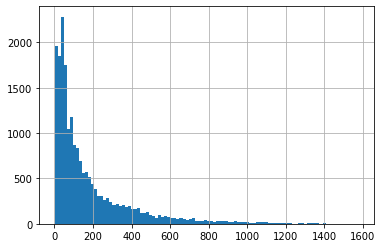

In [71]:
#строю гистограмму по days_exposition
data['days_exposition'].hist(bins = 100)

In [72]:
#считаю медианное значение days_exposition
data['days_exposition'].median()

96.0

In [73]:
#считаю среднеарифметическое значение days_exposition
data['days_exposition'].mean()

181.38605273592387

<AxesSubplot:xlabel='days_exposition'>

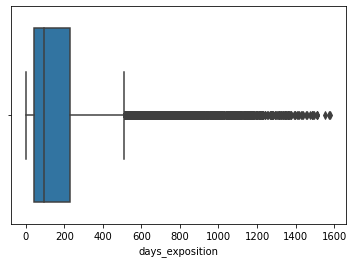

In [74]:
sns.boxplot(data['days_exposition'])

**Вывод:**В среднем(медианном) квартиры продаются за 96 дней, среднеарифметическое показывает примерно 170 дней, но это значение сильно оттягивается квартирами, которые не продаются годами.

Считать быстрой продажей можно значения до медианного, а длинной продажей значения обозначенные как вброс на боксплоте, те примерно 500 дней.

### Какие факторы больше всего влияют на общую стоимость объекта

#### От общей площади

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

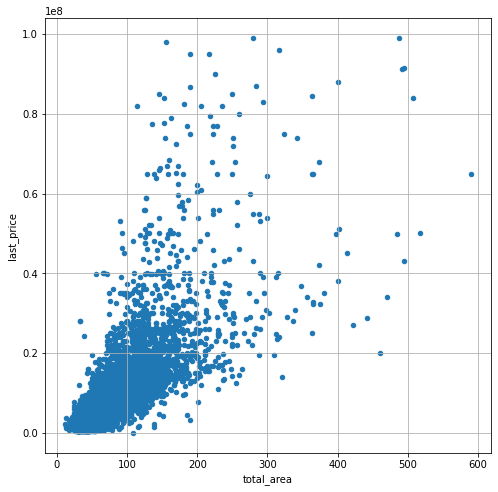

In [75]:
#создаю график зависимости last_price от total_area делая срез по last_price не больше 100000000
(data
     .query('last_price < 100000000')
     .plot(x='total_area', y='last_price', kind='scatter', grid=True, figsize=(8, 8))
)

#### От жилой площади

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

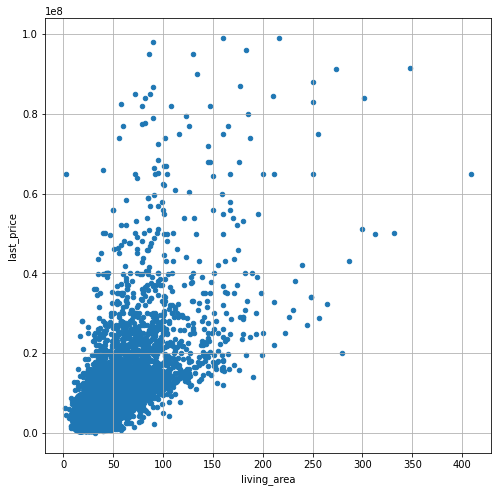

In [76]:
#создаю график зависимости last_price от living_area делая срез по last_price не больше 100000000
(data
     .query('last_price < 100000000')
     .plot(x='living_area', y='last_price', kind='scatter', grid=True, figsize=(8, 8))
)

#### От площади кухни

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

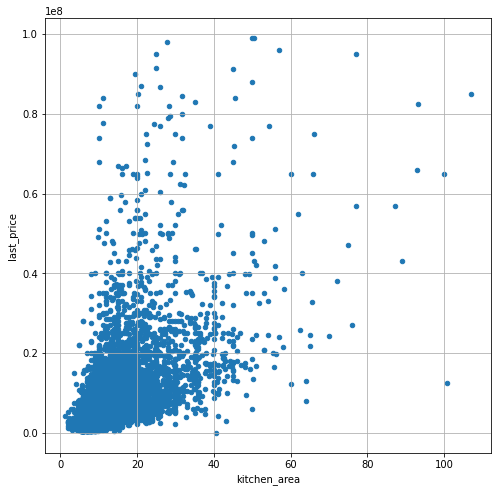

In [77]:
#создаю график зависимости last_price от kitchen_area делая срез по last_price не больше 100000000
(data
     .query('last_price < 100000000')
     .plot(x='kitchen_area', y='last_price', kind='scatter', grid=True, figsize=(8, 8))
)

#### От количества комнат

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

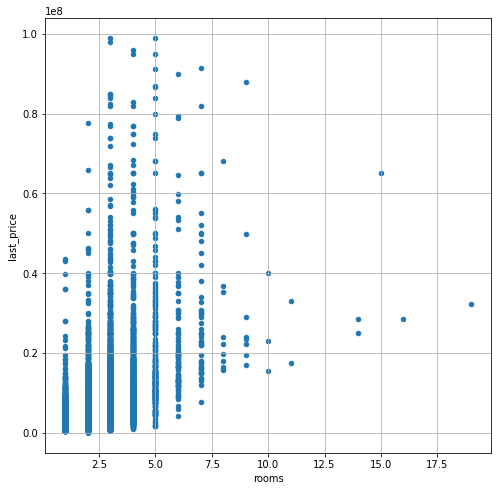

In [78]:
#создаю график зависимости last_price от rooms делая срез по last_price не больше 100000000
(data
     .query('last_price < 100000000')
     .plot(x='rooms', y='last_price', kind='scatter', grid=True, figsize=(8, 8))
)

#### От этажа, на котором расположена квартира

<AxesSubplot:xlabel='floors_type', ylabel='last_price'>

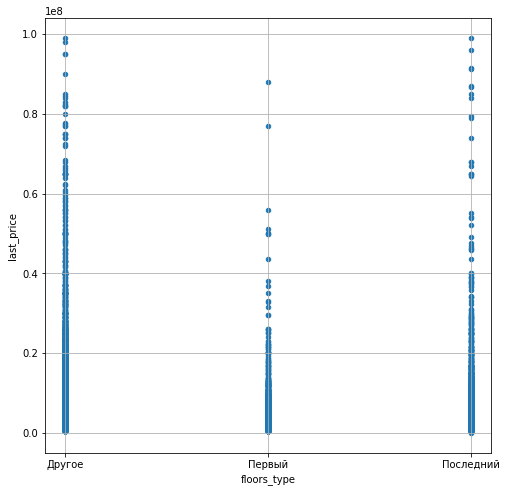

In [79]:
#создаю график зависимости last_price от floors_type делая срез по last_price не больше 100000000
(data
     .query('last_price < 100000000')
     .plot(x='floors_type', y='last_price', kind='scatter', grid=True, figsize=(8, 8))
)

#### От даты размещения

<AxesSubplot:xlabel='weekday', ylabel='last_price'>

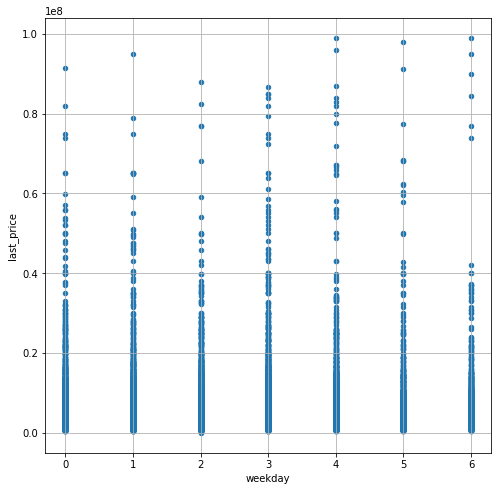

In [80]:
#создаю график зависимости last_price от weekday делая срез по last_price не больше 100000000
(data
     .query('last_price < 100000000')
     .plot(x='weekday', y='last_price', kind='scatter', grid=True, figsize=(8, 8))
)

<AxesSubplot:xlabel='month', ylabel='last_price'>

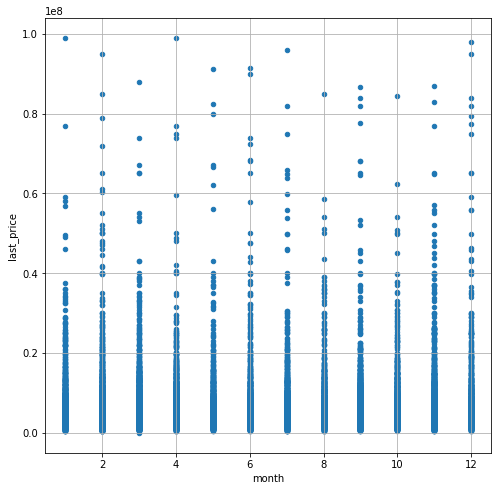

In [81]:
#создаю график зависимости last_price от month делая срез по last_price не больше 100000000
(data
     .query('last_price < 100000000')
     .plot(x='month', y='last_price', kind='scatter', grid=True, figsize=(8, 8))
)

<AxesSubplot:xlabel='year', ylabel='last_price'>

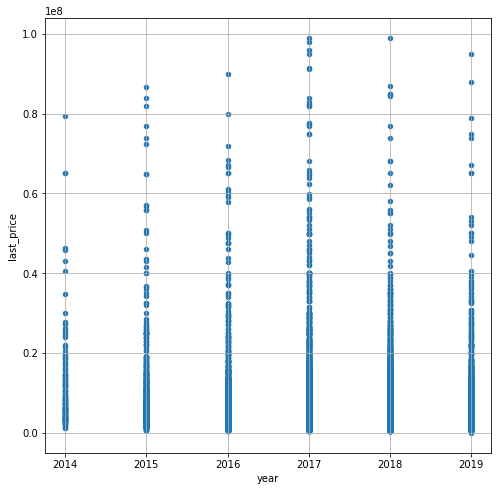

In [82]:
#создаю график зависимости last_price от year делая срез по last_price не больше 100000000
(data
     .query('last_price < 100000000')
     .plot(x='year', y='last_price', kind='scatter', grid=True, figsize=(8, 8))
)

**Вывод:**В целом зависимость цены от общей, жилой и кухонной площади в большенстве случаем прямая, цена растет от увеличения площади. То же самое можно отметить и про количество комнат, чем больше, тем дороже, но график не такой явный. Этажность же особо не влияет на цену, кроме первого этажа, квартиры на нём дешевле. На графиках дней недели и месяцев зависимости не наблюдается, а на графике годов виден рост стоимости в 2017

### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23322 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23322 non-null  int64         
 1   last_price               23322 non-null  int64         
 2   total_area               23322 non-null  float64       
 3   first_day_exposition     23322 non-null  datetime64[ns]
 4   rooms                    23322 non-null  int64         
 5   ceiling_height           23322 non-null  float64       
 6   floors_total             23322 non-null  int64         
 7   living_area              23322 non-null  float64       
 8   floor                    23322 non-null  int64         
 9   is_apartment             23322 non-null  bool          
 10  studio                   23322 non-null  bool          
 11  open_plan                23322 non-null  bool          
 12  kitchen_area             23322 n

In [84]:
#создаю сводную таблицу name_stat_pivot
name_stat_pivot = data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=('median', 'count'))

In [85]:
#вывожу 10 населенных пунктов с наибольшим числом объявлений
name_stat_pivot.sort_values(by='count', ascending=False).head(10)

,count,median
locality_name,,
санкт-петербург,15515,104650.000000
поселок мурино,525,84375.000000
поселок шушары,435,76666.666667
всеволожск,391,65789.473684
пушкин,369,100000.000000
колпино,338,74723.748474
поселок парголово,323,91917.591125
гатчина,306,67860.569236
деревня кудрово,283,91666.666667


**Вывод:**Самая высокая стоимость за один квадратный метр в Санкт-Петербурге, самая низкая в Выборге

### Опишите, как стоимость объектов зависит от расстояния до центра города

In [86]:
#создаю сводную таблицу centers_stat_pivot и делаю срез по locality_name оставляя только значения "санкт-петербург"
centers_stat_pivot = (
    data
    .query('locality_name == "санкт-петербург"')
    .pivot_table(index='city_centers_nearest_km', values='last_price',aggfunc='median')
)
centers_stat_pivot

,last_price
city_centers_nearest_km,
0.0,17900000
1.0,11490000
2.0,10150000
3.0,8419000
4.0,9200000
5.0,9490000
6.0,8900000
7.0,7800000
8.0,7450000


**Вывод:**Из таблицы видно, что стоимость квартир в Санкт-Петербурге прямо пропорционально зависит от удаления от центра города, чем дальше, тем дешевле

## Общий вывод

В ходе работы были выявлены и обработаны аномальные значения датафрейма, заполнены пропуски, проведена обработка дубликатов, изменены типы данных. При обработке от изначального количества строк в датафрейме(23699) было в общей сумме удалено 185 строк, что составляет 0.78%. Также были добавленны новые строки в таблицу для дальнейшего анализа.

Исследование гистограмм данных показало, что в Санкт-Петербурге и ЛО в большинстве преобладают квартиры с общей площадью 40 квадратных метров, из которых жилая площадь 20 квадратных метров, а кухня около 10 квадратных метров, стоимостью в среднем от 3 до 5.5 миллионов рублей, 1 или 2 комнатами, высотой потолков около 2.70 метро, на 2-5 этаже 4 или 8 этажного здания, оо средним расстоянием до центра в 15 киллометрах, до аэропорта в 20 километрах, а до парка в 500 метрах. День публикации такого объявления скорее всего будет в будний. В целом картина выглядит так, что большинство квартир - "вторичка" в "хрущевке". 

В среднем квартиры продаются за 96 дней с момента публикации объявления, в большинтсве случаев(85%)продаются в течении года

Анализ факторов влияющих на стоимость объекта показал, что общая площадь, жилая площадь, площадь кухни и расстояние до центра города имеют прямую зависимость с ценой квартиры, так же благоприятным фактором можно счесть этажность выше первого, в остальном корреляция не такая явная. Лучшим днем является четверг, месяцем ноябрь или февраль, а годом 2017. 

Самым выгодным для продажи недвижимости городом является Санкт-Петербург со средней ценой в 104650 рублей за квадратный метр, а самым невыгодным Выборг с 58307 рублей за квадратный метр.

В итоге я предполагаю, чтобы извлечь выгоду нужно было на спаде стоимости квартир в 2019 году вложиться в 2 комнатную квартиру с общей площадью 50+ квадратных метров не на первом этаже в Санкт-Петербурге в 10-15 киллометрах от центра.